<a href="https://colab.research.google.com/github/resthiana12/Kelainan_Psikologis_CNN/blob/main/Indonesia_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sastrawi

In [2]:
pip install swifter

In [3]:
pip install emoji

In [4]:
pip install emot

In [5]:
#load library
import nltk                             
import matplotlib.pyplot as plt           
import random  
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
import numpy as np
import pandas as pd
import re                                  
import string                             
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 
from nltk import pos_tag, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import emoji
#from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
# load data
full_df = pd.read_csv('drive/MyDrive/data_noemoticon/seimbangakan_keyword_1.csv')
df = full_df[["Label", "Postingan"]]
full_df.head(18)

,Label,Postingan
0,1,depresi & kecemasan saya merayapi saya
1,1,depresi memburuku
2,1,Saya dalam keadaan depresi terus-menerus
3,1,setiap kali kita berbicara tentang depresi dal...
4,1,Semua depresi ini bukan lelucon.. Aku sangat m...
5,1,Oh wow. Saya berutang banyak kepada Anda (dan ...
6,1,"ah saya baru saja mendapat penglihatan, saya m..."
7,1,"Oh oke, saya melihat bagaimana itu. Periode da..."
8,1,"Depresi, BPD, kecemasan menyedot tanpa tempat ..."
9,1,Twitter telah menjadi tempat di mana saya bisa...


In [7]:
df['Postingan'] = df['Postingan'].replace(r'\\n',' ', regex=True) 
df['Postingan'].head(18)

0                depresi & kecemasan saya merayapi saya
1                                     depresi memburuku
2              Saya dalam keadaan depresi terus-menerus
3     setiap kali kita berbicara tentang depresi dal...
4     Semua depresi ini bukan lelucon.. Aku sangat m...
5     Oh wow. Saya berutang banyak kepada Anda (dan ...
6     ah saya baru saja mendapat penglihatan, saya m...
7     Oh oke, saya melihat bagaimana itu. Periode da...
8     Depresi, BPD, kecemasan menyedot tanpa tempat ...
9     Twitter telah menjadi tempat di mana saya bisa...
10          Depresi dan kecanduan narkoba tidak berbaur
11    Saya tidak bisa tidur Saya tidak bisa makan de...
12    Percayalah, saya tahu. Saya tahu betul seperti...
13    Hidup saya hanyalah satu serangan kecemasan pa...
14    Butuh dua jam untuk berbelanja bahan makanan d...
15    13 hari* depresi memukul sangat keras sehingga...
16                         aku memasak. depresi dimana?
17        Menggunakan narkoba untuk menghindari 

In [8]:
def case_folding_lower(text):
    return text.lower()

def case_folding_punct(text):
    PUNCT_TO_REMOVE = string.punctuation
    punct = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
    return punct

def tokenize(text):
    return word_tokenize(text)

In [9]:
df['case_folding_lower'] = df['Postingan'].apply(case_folding_lower)
df['case_folding_punct'] = df['case_folding_lower'].apply(lambda text:case_folding_punct(text))
df['tokenize'] = df['case_folding_punct'].apply(tokenize)
df.head()

,Label,Postingan,case_folding_lower,case_folding_punct,tokenize
0,1,depresi & kecemasan saya merayapi saya,depresi & kecemasan saya merayapi saya,depresi kecemasan saya merayapi saya,"[depresi, kecemasan, saya, merayapi, saya]"
1,1,depresi memburuku,depresi memburuku,depresi memburuku,"[depresi, memburuku]"
2,1,Saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terusmenerus,"[saya, dalam, keadaan, depresi, terusmenerus]"
3,1,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,"[setiap, kali, kita, berbicara, tentang, depre..."
4,1,Semua depresi ini bukan lelucon.. Aku sangat m...,semua depresi ini bukan lelucon.. aku sangat m...,semua depresi ini bukan lelucon aku sangat marah,"[semua, depresi, ini, bukan, lelucon, aku, san..."


In [10]:
#hanya untuk laporan
stop = pd.read_csv("drive/MyDrive/stopwords.txt", names= ["stopwords"], header = None)
stop_words_corpus = list(stopwords.words('indonesian'))
stop_from_list = stop['stopwords'].to_list()
def remove_stopwords(post):
  filtered_words = [w for w in post if w not in stop_words_corpus]
  filtered_words = [w for w in filtered_words if w not in stop_from_list]
  return filtered_words

In [11]:
df['remove_stopwords'] = df['tokenize'].apply(remove_stopwords)
df.head()

,Label,Postingan,case_folding_lower,case_folding_punct,tokenize,remove_stopwords
0,1,depresi & kecemasan saya merayapi saya,depresi & kecemasan saya merayapi saya,depresi kecemasan saya merayapi saya,"[depresi, kecemasan, saya, merayapi, saya]","[depresi, kecemasan, merayapi]"
1,1,depresi memburuku,depresi memburuku,depresi memburuku,"[depresi, memburuku]","[depresi, memburuku]"
2,1,Saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terusmenerus,"[saya, dalam, keadaan, depresi, terusmenerus]","[depresi, terusmenerus]"
3,1,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,"[setiap, kali, kita, berbicara, tentang, depre...","[kali, berbicara, depresi, psikologi, mata, sa..."
4,1,Semua depresi ini bukan lelucon.. Aku sangat m...,semua depresi ini bukan lelucon.. aku sangat m...,semua depresi ini bukan lelucon aku sangat marah,"[semua, depresi, ini, bukan, lelucon, aku, san...","[depresi, lelucon, marah]"


In [12]:
def remove_punct(text):
  text_nopunct = ''
  text_nopunct = re.sub('['+string.punctuation+']', '', text)
  return text_nopunct

In [13]:
df['remove_stopwords'] = df['remove_stopwords'].astype(str)
df['remove_stopwords'] = df['remove_stopwords'].apply(remove_punct)
df.head()

,Label,Postingan,case_folding_lower,case_folding_punct,tokenize,remove_stopwords
0,1,depresi & kecemasan saya merayapi saya,depresi & kecemasan saya merayapi saya,depresi kecemasan saya merayapi saya,"[depresi, kecemasan, saya, merayapi, saya]",depresi kecemasan merayapi
1,1,depresi memburuku,depresi memburuku,depresi memburuku,"[depresi, memburuku]",depresi memburuku
2,1,Saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terusmenerus,"[saya, dalam, keadaan, depresi, terusmenerus]",depresi terusmenerus
3,1,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,"[setiap, kali, kita, berbicara, tentang, depre...",kali berbicara depresi psikologi mata samping ...
4,1,Semua depresi ini bukan lelucon.. Aku sangat m...,semua depresi ini bukan lelucon.. aku sangat m...,semua depresi ini bukan lelucon aku sangat marah,"[semua, depresi, ini, bukan, lelucon, aku, san...",depresi lelucon marah


In [14]:
# Function to remove punctuations, links, emojis, and stop words
def preprocess_filter(tweet):
    #Remove 'b
    tweet = re.sub(r"b'", '', tweet)
    # Remove urls dan trash
    tweet = re.sub(r"http\S+|\\x\S+|www\S+|https\S+|dot|com", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words_fix]
    #filtered_words = [w for w in tweet_tokens if w not in user_stopwords]
    filtered_words = [w for w in tweet_tokens if w not in stop_from_list]
    #filtered_words = [w for w in filtered_words if w not in emojis]
   # filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them

In [15]:
# Function to remove punctuations, links, emojis, and stop words
def preprocess_filtered(post):
    #Remove 'b
    posted = re.sub(r"b'", '', post)
    # Remove urls dan trash
    posted = re.sub(r"http\S+|\\x\S+|www\S+|https\S+|dot|com", '', posted, flags=re.MULTILINE)
    # Remove user @ references and '#' from post
    posted = re.sub(r'\@\w+|\#|\d+', '', post)

    return posted

In [16]:
df['filtered'] = df['remove_stopwords'].apply(preprocess_filtered)
df.head(18)

,Label,Postingan,case_folding_lower,case_folding_punct,tokenize,remove_stopwords,filtered
0,1,depresi & kecemasan saya merayapi saya,depresi & kecemasan saya merayapi saya,depresi kecemasan saya merayapi saya,"[depresi, kecemasan, saya, merayapi, saya]",depresi kecemasan merayapi,depresi kecemasan merayapi
1,1,depresi memburuku,depresi memburuku,depresi memburuku,"[depresi, memburuku]",depresi memburuku,depresi memburuku
2,1,Saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terusmenerus,"[saya, dalam, keadaan, depresi, terusmenerus]",depresi terusmenerus,depresi terusmenerus
3,1,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,"[setiap, kali, kita, berbicara, tentang, depre...",kali berbicara depresi psikologi mata samping ...,kali berbicara depresi psikologi mata samping ...
4,1,Semua depresi ini bukan lelucon.. Aku sangat m...,semua depresi ini bukan lelucon.. aku sangat m...,semua depresi ini bukan lelucon aku sangat marah,"[semua, depresi, ini, bukan, lelucon, aku, san...",depresi lelucon marah,depresi lelucon marah
5,1,Oh wow. Saya berutang banyak kepada Anda (dan ...,oh wow. saya berutang banyak kepada anda (dan ...,oh wow saya berutang banyak kepada anda dan ko...,"[oh, wow, saya, berutang, banyak, kepada, anda...",berutang kolega minggu depresi kecemasan inter...,berutang kolega minggu depresi kecemasan inter...
6,1,"ah saya baru saja mendapat penglihatan, saya m...","ah saya baru saja mendapat penglihatan, saya m...",ah saya baru saja mendapat penglihatan saya me...,"[ah, saya, baru, saja, mendapat, penglihatan, ...",penglihatan tidur siang depresi 14 jam arah,penglihatan tidur siang depresi jam arah
7,1,"Oh oke, saya melihat bagaimana itu. Periode da...","oh oke, saya melihat bagaimana itu. periode da...",oh oke saya melihat bagaimana itu periode dan ...,"[oh, oke, saya, melihat, bagaimana, itu, perio...",oke periode depresi menggandakan menyebalkan t...,oke periode depresi menggandakan menyebalkan t...
8,1,"Depresi, BPD, kecemasan menyedot tanpa tempat ...","depresi, bpd, kecemasan menyedot tanpa tempat ...",depresi bpd kecemasan menyedot tanpa tempat un...,"[depresi, bpd, kecemasan, menyedot, tanpa, tem...",depresi bpd kecemasan menyedot melampiaskan,depresi bpd kecemasan menyedot melampiaskan
9,1,Twitter telah menjadi tempat di mana saya bisa...,twitter telah menjadi tempat di mana saya bisa...,twitter telah menjadi tempat di mana saya bisa...,"[twitter, telah, menjadi, tempat, di, mana, sa...",twitter menulis perjuangan melawan kecemasan d...,twitter menulis perjuangan melawan kecemasan d...


In [17]:
df['filtered_tokenize'] = df['filtered'].apply(tokenize)
df['filtered_tokenize'].head(18)

0                        [depresi, kecemasan, merayapi]
1                                  [depresi, memburuku]
2                               [depresi, terusmenerus]
3     [kali, berbicara, depresi, psikologi, mata, sa...
4                             [depresi, lelucon, marah]
5     [berutang, kolega, minggu, depresi, kecemasan,...
6       [penglihatan, tidur, siang, depresi, jam, arah]
7     [oke, periode, depresi, menggandakan, menyebal...
8     [depresi, bpd, kecemasan, menyedot, melampiaskan]
9     [twitter, menulis, perjuangan, melawan, kecema...
10               [depresi, kecanduan, narkoba, berbaur]
11              [tidur, makan, sedih, selamat, depresi]
12                     [percayalah, depresi, kecemasan]
13    [hidup, serangan, kecemasan, dipenuhi, depresi...
14    [butuh, jam, berbelanja, bahan, makanan, energ...
15                     [depresi, memukul, keras, bodoh]
16                           [memasak, depresi, dimana]
17                      [narkoba, menghindari, d

In [18]:
normalizad_word = pd.read_excel("drive/MyDrive/normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['normalized'] = df['filtered_tokenize'].apply(normalized_term)

df['normalized'].head(18)


0                        [depresi, kecemasan, merayapi]
1                                  [depresi, memburuku]
2                               [depresi, terusmenerus]
3     [kali, berbicara, depresi, psikologi, mata, sa...
4                             [depresi, lelucon, marah]
5     [berutang, kolega, minggu, depresi, kecemasan,...
6       [penglihatan, tidur, siang, depresi, jam, arah]
7     [baik, periode, depresi, menggandakan, menyeba...
8     [depresi, bpd, kecemasan, menyedot, melampiaskan]
9     [twitter, menulis, perjuangan, melawan, kecema...
10               [depresi, kecanduan, narkoba, berbaur]
11              [tidur, makan, sedih, selamat, depresi]
12                     [percayalah, depresi, kecemasan]
13    [hidup, serangan, kecemasan, dipenuhi, depresi...
14    [butuh, jam, berbelanja, bahan, makanan, energ...
15                     [depresi, memukul, keras, bodoh]
16                           [memasak, depresi, dimana]
17                      [narkoba, menghindari, d

In [19]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemmed'] = df['normalized'].swifter.apply(get_stemmed_term)
print(df['stemmed'])

95
------------------------
depresi : depresi
kecemasan : cemas
merayapi : rayap
memburuku : buru
terusmenerus : terusmenerus
kali : kali
berbicara : bicara
psikologi : psikologi
mata : mata
samping : samping
jalang : jalang
berteriak : teriak
lelucon : lelucon
marah : marah
berutang : utang
kolega : kolega
minggu : minggu
interaksi : interaksi
nyata : nyata
dunia : dunia
langsung : langsung
internet : internet
twitter : twitter
email : email
memiliki : milik
membiarkan : biar
orang… : orang
penglihatan : lihat
tidur : tidur
siang : siang
jam : jam
arah : arah
baik : baik
periode : periode
menggandakan : ganda
menyebalkan : sebal
tahan : tahan
kegagalan : gagal
makanan : makan
kadaluarsa : kadaluarsa
dimasak : masak
mengerti : erti
terima : terima
kasih : kasih
suka : suka
bpd : bpd
menyedot : sedot
melampiaskan : lampias
menulis : tulis
perjuangan : juang
melawan : lawan
kecanduan : candu
narkoba : narkoba
berbaur : baur
makan : makan
sedih : sedih
selamat : selamat
percayalah : perca

Pandas Apply:   0%|          | 0/21 [00:00<?, ?it/s]

0                               [depresi, cemas, rayap]
1                                       [depresi, buru]
2                               [depresi, terusmenerus]
3     [kali, bicara, depresi, psikologi, mata, sampi...
4                             [depresi, lelucon, marah]
5     [utang, kolega, minggu, depresi, cemas, intera...
6             [lihat, tidur, siang, depresi, jam, arah]
7     [baik, periode, depresi, ganda, sebal, tahan, ...
8                 [depresi, bpd, cemas, sedot, lampias]
9        [twitter, tulis, juang, lawan, cemas, depresi]
10                      [depresi, candu, narkoba, baur]
11              [tidur, makan, sedih, selamat, depresi]
12                            [percaya, depresi, cemas]
13    [hidup, serang, cemas, penuh, depresi, dll, bu...
14    [butuh, jam, belanja, bahan, makan, energi, pu...
15                       [depresi, pukul, keras, bodoh]
16                               [masak, depresi, mana]
17                           [narkoba, hindar, d

In [20]:
df['stemmed'] = df['stemmed'].apply(remove_stopwords) 

In [21]:
df.head()

,Label,Postingan,case_folding_lower,case_folding_punct,tokenize,remove_stopwords,filtered,filtered_tokenize,normalized,stemmed
0,1,depresi & kecemasan saya merayapi saya,depresi & kecemasan saya merayapi saya,depresi kecemasan saya merayapi saya,"[depresi, kecemasan, saya, merayapi, saya]",depresi kecemasan merayapi,depresi kecemasan merayapi,"[depresi, kecemasan, merayapi]","[depresi, kecemasan, merayapi]","[depresi, cemas, rayap]"
1,1,depresi memburuku,depresi memburuku,depresi memburuku,"[depresi, memburuku]",depresi memburuku,depresi memburuku,"[depresi, memburuku]","[depresi, memburuku]","[depresi, buru]"
2,1,Saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terus-menerus,saya dalam keadaan depresi terusmenerus,"[saya, dalam, keadaan, depresi, terusmenerus]",depresi terusmenerus,depresi terusmenerus,"[depresi, terusmenerus]","[depresi, terusmenerus]","[depresi, terusmenerus]"
3,1,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,setiap kali kita berbicara tentang depresi dal...,"[setiap, kali, kita, berbicara, tentang, depre...",kali berbicara depresi psikologi mata samping ...,kali berbicara depresi psikologi mata samping ...,"[kali, berbicara, depresi, psikologi, mata, sa...","[kali, berbicara, depresi, psikologi, mata, sa...","[kali, bicara, depresi, psikologi, mata, sampi..."
4,1,Semua depresi ini bukan lelucon.. Aku sangat m...,semua depresi ini bukan lelucon.. aku sangat m...,semua depresi ini bukan lelucon aku sangat marah,"[semua, depresi, ini, bukan, lelucon, aku, san...",depresi lelucon marah,depresi lelucon marah,"[depresi, lelucon, marah]","[depresi, lelucon, marah]","[depresi, lelucon, marah]"


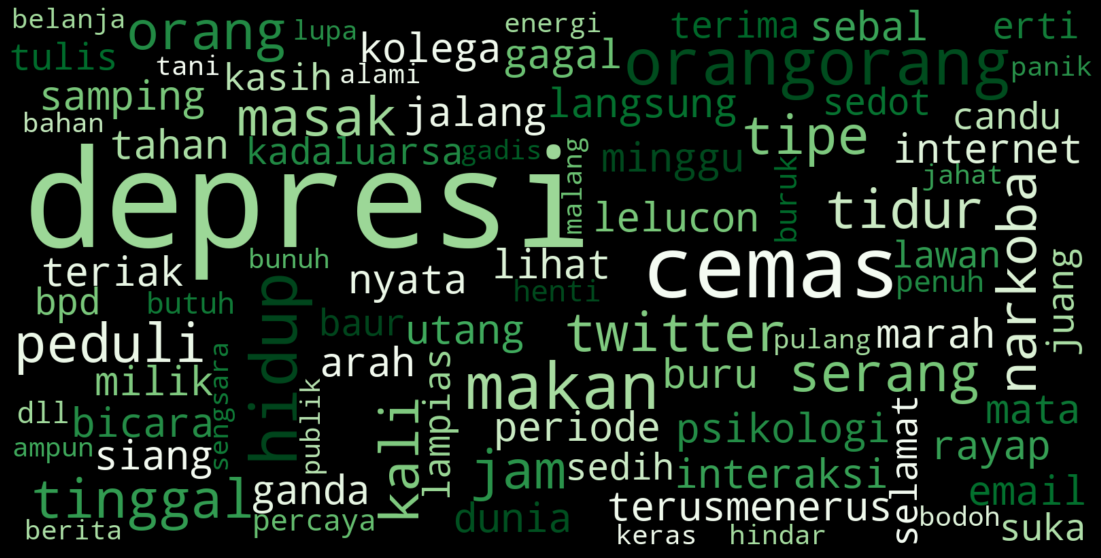

In [22]:
#Frequency Distribution Visualization with Matplotlib
#Untuk menggambarkan frekuensi kemunculan setiap tokens dapat menggunakan library matplotlib pada Python.
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

# Create and generate a word cloud image:
allWords = " ".join(map(" ".join, df['stemmed']))
wordCloud = WordCloud(colormap="Greens_r", width=1600, height=800, random_state=30, max_font_size=200, min_font_size=20).generate(allWords)

# Display the generated image:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
#df.to_csv('drive/MyDrive/data_noemoticon/seimbangkan_keyword_fix_1.csv', sep= ',' , encoding='utf-8')

In [24]:
#df.head()

In [25]:
# load data
#full_df_2 = pd.read_csv('drive/MyDrive/data_psyco/Text_Preprocessing_Suicide_Row_Same_4_fix.csv')
#full_df_2.head(18)